In [1]:
# import os
# from os import listdir, makedirs
# from os.path import join, exists, expanduser

# import random
# from tqdm import tqdm
# import numpy as np

# import pickle
# import datetime as dt

# import itertools
# import matplotlib.pyplot as plt
# %matplotlib inline
# import matplotlib.image as mpimg
# import seaborn as sns


# from sklearn.model_selection import train_test_split
# from sklearn.metrics import log_loss, accuracy_score
# from sklearn.metrics import confusion_matrix

# from sklearn.linear_model import LogisticRegression

# import cv2

# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.vgg16 import preprocess_input, decode_predictions

# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.models import Sequential

# from keras.optimizers import RMSprop


# from keras.callbacks import ReduceLROnPlateau
# from mpl_toolkits.axes_grid1 import ImageGrid



# # from keras.applications.vgg16 import VGG16
# # from keras.applications.resnet50 import ResNet50
# # from keras.applications import xception
# from keras.applications import inception_v3



# from keras.applications.vgg16 import preprocess_input, decode_predictions

# np.random.seed(2)
# sns.set(style='white', context='notebook', palette='deep')

In [2]:
# cache_dir = expanduser(join('~', '.keras'))
# if not exists(cache_dir):
#     makedirs(cache_dir)
# models_dir = join(cache_dir, 'models')
# if not exists(models_dir):
#     makedirs(models_dir)

In [4]:
import pandas as pd

raw_labels = pd.read_csv("data/labels.csv")

In [5]:
labels_only = raw_labels['breed']

labels_set = set(labels_only)

num_labels = len(labels_set)


map_breed = {}


i=0;

for breed in labels_set:
    map_breed[breed] = i
    i+=1
    

label_map={}
for i in range(len(raw_labels['id'])):
    label_map[raw_labels['id'][i]] = map_breed[raw_labels['breed'][i]]
    

In [6]:
val_breed = {}
for item in map_breed:
    val_breed[map_breed[item]]=item
    
breed_val = {}
for item in val_breed:
    breed_val[val_breed[item]]=item
    

In [7]:
def show_data_uncat(path, IMG_SIZE, num):
    i=0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            
#             img_array = cv2.imread(os.path.join(path,img))
#             img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            
            cv2.imshow("image", img_array)
            
            plt.show()
            
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            plt.imshow(new_array)
            plt.show()         
        except Exception as e: 
            pass
        if i>num:
            break
        i+=1

def show_data(path, IMG_SIZE, num):
    i=0
    dirs = os.listdir(path)
    for directory in dirs:
        files = os.listdir(os.path.join(path, directory))
        for file in files:
            img = os.path.join(os.path.join(path, directory), file)
            try:
#                 img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
                img_array = cv2.imread(img, cv2.IMREAD_UNCHANGED)
                cv2.imshow("image", img_array)
                plt.show()

                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                plt.imshow(new_array)
                plt.show()         
            except Exception as e: 
                pass
            if i>num:
                break
            i+=1


def read_prep_data_uncat(path, IMG_SIZE, label_map):
    data=[]
    for img in tqdm(os.listdir(path)):
        try:
#             img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            data.append([new_array, label_map[img[:-4]]])  
        except Exception as e: 
            pass
    return data



def read_prep_data(path, IMG_SIZE, label_map):
    data=[]

    dirs = tqdm(os.listdir(path))
    for directory in dirs:
        files = os.listdir(os.path.join(path, directory))
        for file in files:
            img = os.path.join(os.path.join(path, directory), file)
            try:
                img_array = cv2.imread(img, cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                data.append([new_array, label_map[directory]])  
            except Exception as e: 
                print("e: ", e)
    return data
        
    
def select_categories(data, num_label):
    X=[]
    Y=[]
    
    random.shuffle(data)
    
    for features,label in training_data:
        if label in range(0, num_label):
            X.append(features)
            Y.append(label)
    return X, Y



In [8]:
# def get_model(IMG_SIZE, num_label):
#     model = Sequential()

#     model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                      activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
#     model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                      activation ='relu'))
#     model.add(MaxPool2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))


#     model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                      activation ='relu'))
#     model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                      activation ='relu'))
#     model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Dropout(0.25))


#     model.add(Flatten())
#     model.add(Dense(256, activation = "relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_label, activation = "softmax"))
    
#     return model

In [9]:
# def get_pred(data, model):
#     preds = model.predict(data)
#     return preds

# def get_pred_models(data, models, model_names):
#     preds_models = {}
#     for i in range(len(models)):
#         preds_models[model_names[i]] = get_pred(data, models[i])
    
#     return preds_models
        
# def show_pred(preds, Y, val_breed, index, seq, ran):
#     leng = len(preds)
#     if seq:
#         for i in range(index):
#             if ran:
#                 index = random.randint(0, leng) 
#             _, imagenet_class_name, prob = decode_predictions(preds, top=1)[index][0]
#             plt.title("Original: " + val_breed[Y[index]] + "\nPrediction: " + imagenet_class_name)
#             plt.imshow(X_train[index])
#             plt.show()
#     else:
#             _, imagenet_class_name, prob = decode_predictions(preds, top=1)[index][0]
#             plt.title("Original: " + val_breed[Y[index]] + "\nPrediction: " + imagenet_class_name)
#             plt.imshow(X_train[index])
#             plt.show()
        
# def accuracy_func(preds, Y, val_breed):
#     leng = len(preds)
#     count = 0;
#     for i in range(leng):
#         _, imagenet_class_name, prob = decode_predictions(preds, top=1)[i][0]
#         if val_breed[Y[i]] == imagenet_class_name:
#             count+=1
#     accuracy = (count/leng)*100
    
#     print("Accuracy: ", accuracy)
#     return accuracy

In [10]:
# def read_img(img_id, train_or_test, size):
#     """Read and resize image.
#     # Arguments
#         img_id: string
#         train_or_test: string 'train' or 'test'.
#         size: resize the original image.
#     # Returns
#         Image as numpy array.
#     """
#     img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
#     img = image.img_to_array(img)
#     return img

In [39]:
# training_path = "data\\pre\\train"
# testing_path = "data\\pre\\test"
# validation_path = "data\\pre\\validation"
# IMG_SIZE = 224
# num=10

In [40]:
# show_data(training_path, IMG_SIZE, num)

# show_data(testing_path, IMG_SIZE, num)

In [11]:
# training_data = read_prep_data(training_path, IMG_SIZE, breed_val)
# testing_data = read_prep_data(testing_path, IMG_SIZE, breed_val)
# validation_data = read_prep_data(validation_path, IMG_SIZE, breed_val)

# print(len(training_data))
# print(len(testing_data))

In [14]:
# training_data_file = "data/pickle/training_data"
# testing_data_file = "data/pickle/testing_data"

In [15]:
# pickle_save(training_data, training_data_file)
# pickle_save(testing_data, testing_data_file)

In [16]:
# training_data = pickle_load(training_data_file)
# testing_data = pickle_load(testing_data_file)

In [17]:
# num_label = num_labels
# num_label = 10

In [12]:
# X_train, Y_train = select_categories(training_data, num_label)
# X_test, Y_test = select_categories(testing_data, num_label)
 
# # print(set(Y_train))
# print(len(X_train))

# # print(set(Y_test))
# print(len(X_test))

In [19]:
# X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,3)
# X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [20]:
# Y_train = to_categorical(Y_train, num_classes = num_label)
# Y_test = to_categorical(Y_test, num_classes = num_label)

In [13]:
from keras.applications.inception_v3 import InceptionV3
# from keras.preprocessing import image


# from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

C:\Users\Andromeda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
from keras.layers import Dense, GlobalAveragePooling2D

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(120, activation='softmax')(x)


In [17]:
from keras.models import Model

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [20]:
from keras import optimizers

sgd = optimizers.Adam()
# sgd = optimizers.SGD()
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = optimizer=SGD(lr=0.0001, momentum=0.9)


# compile the model (should be done *after* setting layers to non-trainable)
model.compile(sgd, loss='categorical_crossentropy')

In [43]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        training_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 7221 images belonging to 120 classes.
Found 2043 images belonging to 120 classes.


In [44]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True



0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [45]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD


sgd = optimizers.Adam()
# sgd = optimizers.SGD()
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = optimizer=SGD(lr=0.0001, momentum=0.9)


model.compile(sgd, loss='categorical_crossentropy', metrics=["accuracy"])


In [46]:
model_dir = 'outputs/models/'
log_file = "outputs/logs"

model_file = model_dir+"weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

In [47]:
import keras

checkpoint = keras.callbacks.ModelCheckpoint(model_file, monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [48]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None)

# early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)

In [49]:
tensorboard = keras.callbacks.TensorBoard(log_dir=log_file, histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)
tensorboard.set_model(model) 

In [50]:
callbacks_list = [checkpoint, tensorboard, early_stopping]
# callbacks_list = [checkpoint, tensorboard]

In [51]:
def clear_dir(directory):
    if os.path.exists(directory):
        try:
            shutil.rmtree(directory)
            os.mkdir(directory)
        except:
            print("error:", directory)
    else:
        try:
            os.mkdir(directory)
        except:
            print("error create:", directory)

In [52]:
clear_dir(model_dir)
clear_dir(log_file)

error: outputs/models/
error: outputs/logs


In [53]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=callbacks_list)

Epoch 1/50
110/226 [=============>................] - ETA: 1:00:57 - loss: 4.8761 - acc: 0.03 - ETA: 50:30 - loss: 5.1101 - acc: 0.0312 - ETA: 47:31 - loss: 5.1182 - acc: 0.03 - ETA: 45:18 - loss: 4.9293 - acc: 0.07 - ETA: 43:29 - loss: 4.9831 - acc: 0.08 - ETA: 42:16 - loss: 4.8590 - acc: 0.09 - ETA: 41:38 - loss: 4.8530 - acc: 0.10 - ETA: 41:15 - loss: 4.8562 - acc: 0.10 - ETA: 41:08 - loss: 4.8516 - acc: 0.10 - ETA: 41:01 - loss: 4.7731 - acc: 0.10 - ETA: 40:51 - loss: 4.7543 - acc: 0.10 - ETA: 40:35 - loss: 4.6984 - acc: 0.10 - ETA: 40:30 - loss: 4.6733 - acc: 0.10 - ETA: 40:20 - loss: 4.6417 - acc: 0.11 - ETA: 40:04 - loss: 4.6506 - acc: 0.11 - ETA: 40:00 - loss: 4.6204 - acc: 0.11 - ETA: 39:52 - loss: 4.5992 - acc: 0.11 - ETA: 39:37 - loss: 4.5768 - acc: 0.10 - ETA: 39:22 - loss: 4.5598 - acc: 0.10 - ETA: 38:58 - loss: 4.5399 - acc: 0.10 - ETA: 38:34 - loss: 4.5208 - acc: 0.11 - ETA: 38:36 - loss: 4.4835 - acc: 0.11 - ETA: 38:38 - loss: 4.4481 - acc: 0.12 - ETA: 38:43 - loss: 4.4

KeyboardInterrupt: 

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
filepath = 'outputs/models/weights-improvement-01-0.92.hdf5'
model = keras.models.load_model(filepath)

In [ ]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1,
    callbacks=callbacks_list)

In [ ]:
# filepath = 'outputs/models/weights-improvement-01-0.65.hdf5'
# filepath = 'outputs/models/weights-improvement-02-0.66.hdf5'
# filepath = 'outputs/models/weights-improvement-03-0.88.hdf5'
filepath = 'outputs/models/weights-improvement-04-0.75.hdf5'


# filepath = 'outputs/models/weights-improvement-01-0.92.hdf5'
# filepath = 'outputs/models/weights-improvement-02-0.83.hdf5'

model = keras.models.load_model(filepath)

In [ ]:
result = model.evaluate_generator(generator=test_generator, verbose=1)

In [ ]:
print("%s%.2f%s"% ("Accuracy: ", result[1]*100, "%"))
print("%s%.2f"% ("Loss: ", result[0]))

In [ ]:
preds = model.predict_generator(test_generator, verbose=1)

In [ ]:
categorical_accuracy = keras.metrics.categorical_accuracy(test_generator.classes, preds)

In [ ]:
categorical_accuracy

In [ ]:
'''
filepath = 'outputs/models/weights-improvement-01-0.66.hdf5'


filepath = 'outputs/models/weights-improvement-02-0.68.hdf5'


filepath = 'outputs/models/weights-improvement-03-0.88.hdf5'


filepath = 'outputs/models/weights-improvement-04-0.75.hdf5'
Accuracy: 75.31%
Loss: 0.47


filepath = 'outputs/models/weights-improvement-01-0.92.hdf5'
Accuracy: 80.94%
Loss: 0.47
'''
# tensorboard --logdir=logs

In [ ]:
model.predict()

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

In [421]:
norm = 255.0
X_train, X_test = X_train/norm, X_test/norm

# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


model = get_model(IMG_SIZE, num_label)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)


epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 32




In [422]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [425]:
len(Y_train)

225

In [426]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

ValueError: Error when checking input: expected conv2d_291_input to have shape (224, 224, 1) but got array with shape (224, 224, 3)

In [30]:
start = dt.datetime.now()

In [32]:
preds = get_pred(X_train, vgg_model)

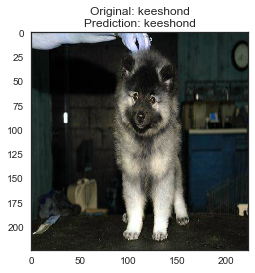

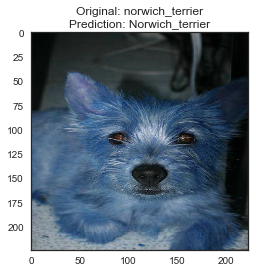

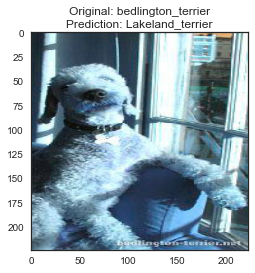

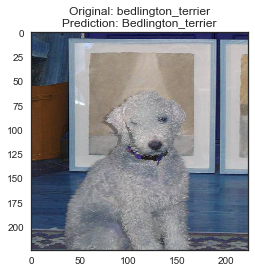

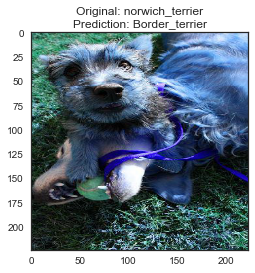

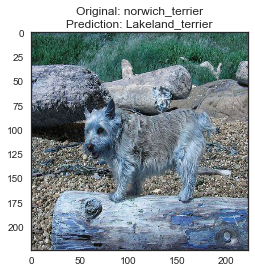

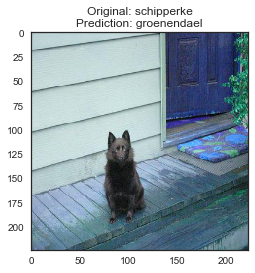

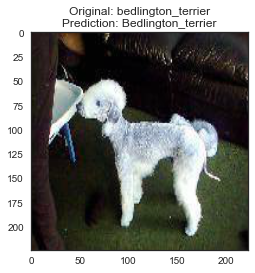

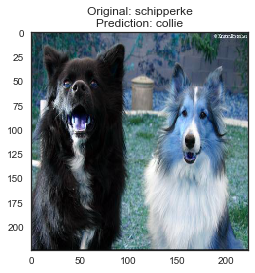

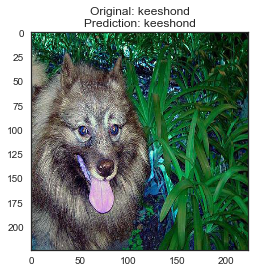

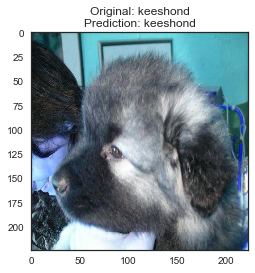

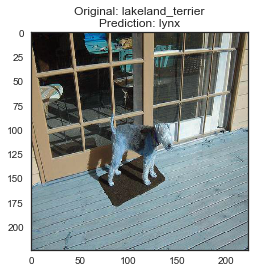

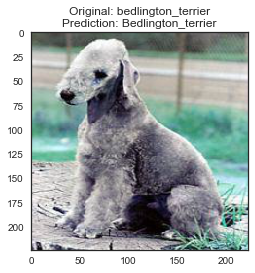

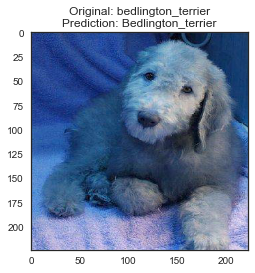

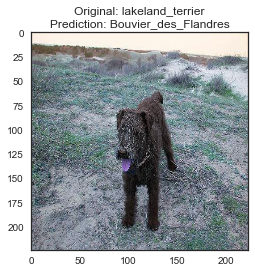

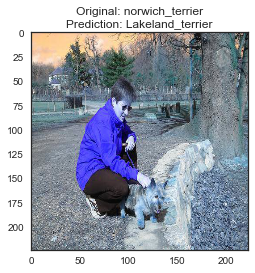

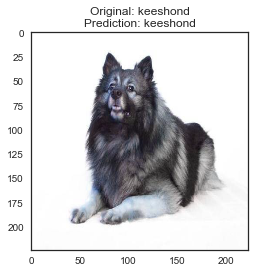

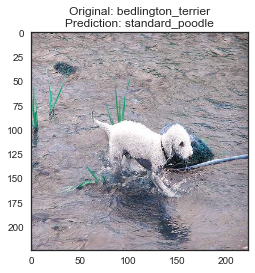

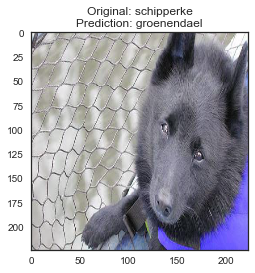

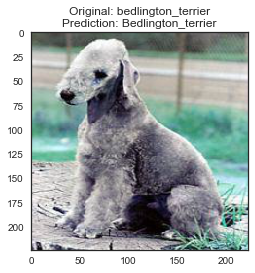

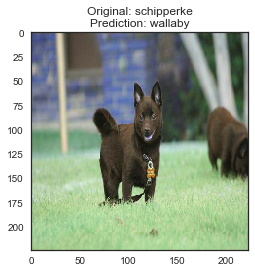

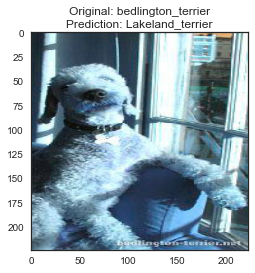

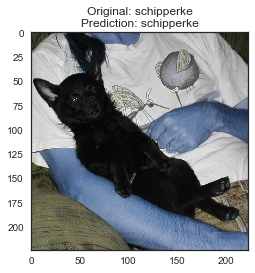

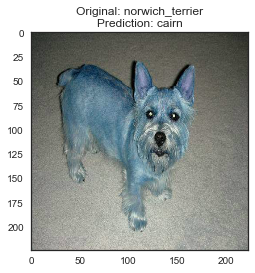

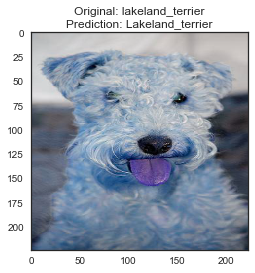

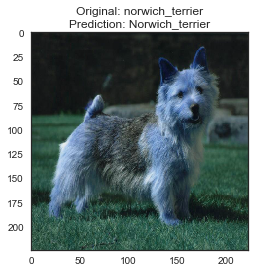

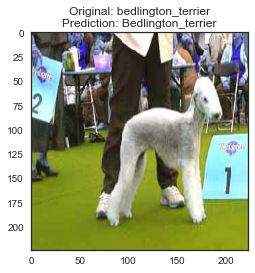

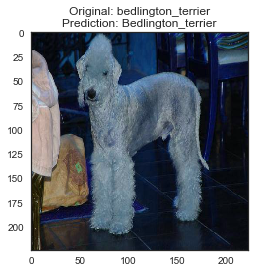

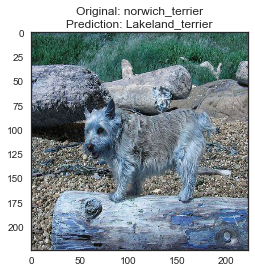

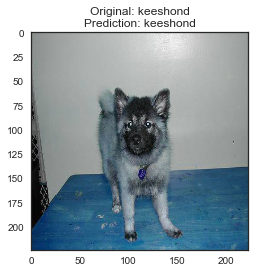

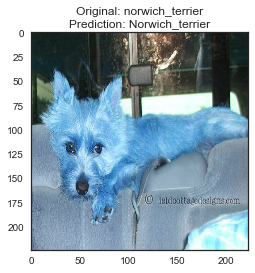

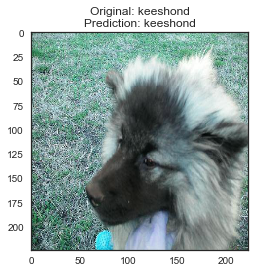

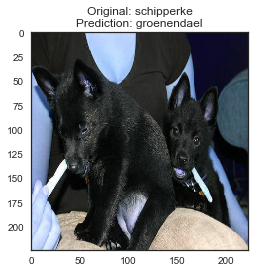

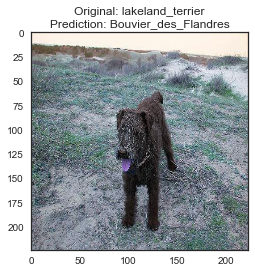

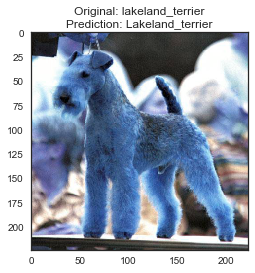

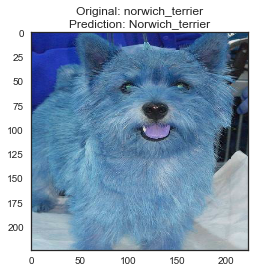

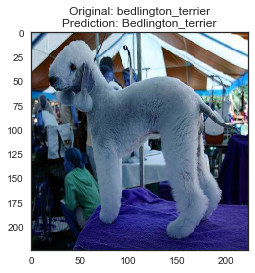

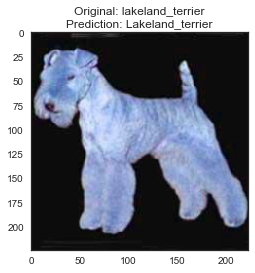

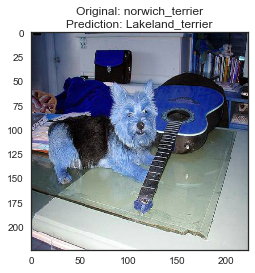

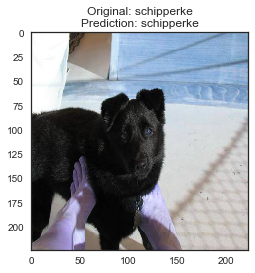

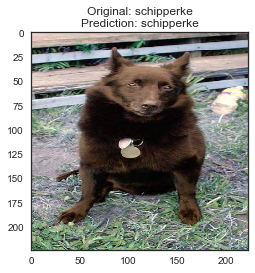

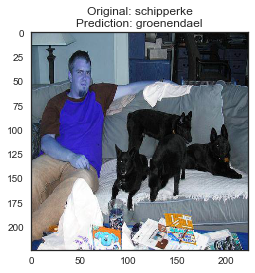

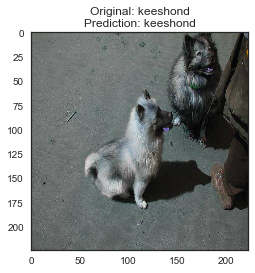

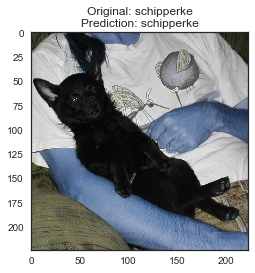

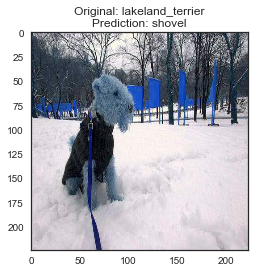

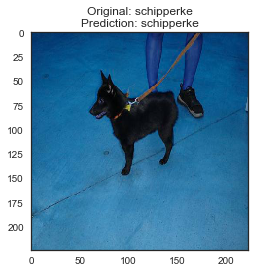

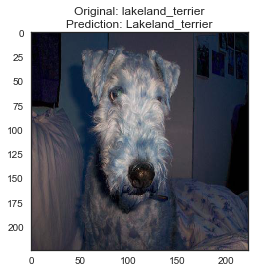

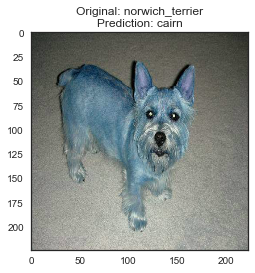

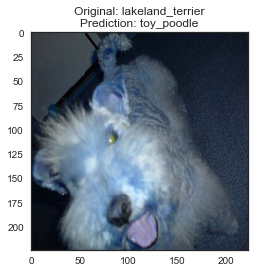

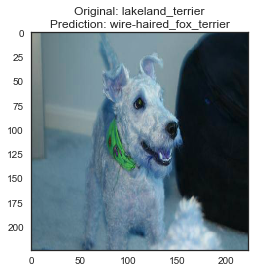

In [34]:
show_pred(preds, Y_train, val_breed, 50, True, True)

In [35]:
accuracy = accuracy_func(preds, Y_train, val_breed)

Accuracy:  29.099307159353348


In [47]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [58]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [ ]:
# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model = vgg_model

optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Compile the model
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])



# # Set a learning rate annealer
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.001)

# epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
# batch_size = 32

In [ ]:
models = [vgg_model, inception_model, resnet_model, mobilenet_model]
models = [vgg_model]
model_names = ["Vgg", "Inception", "Resnet", "Mobilenet"]
model_names = ["Vgg"]

preds_models = get_pred_models(X_train, models, model_names)

In [59]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
c
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/models/vgg16_weights.h5'
top_model_weights_path = 'data/fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)


In [62]:
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
# top_model.add(Dense(1, activation='sigmoid'))


top_model.add(Flatten())
top_model.add(Dense(256, activation = "relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_label, activation = "softmax"))

Model loaded.


In [ ]:
# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

In [ ]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'data/fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'cats_and_dogs_small/train'
validation_data_dir = 'cats_and_dogs_small/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)